In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import math
from collections import Counter, defaultdict
from statistics import mean

In [2]:
pd.set_option("display.precision", 20)
sheet = pd.read_csv('metrics.csv')
sheet

,Timestamp,Session_Id,Brick_Count,Attempts,Level_Number,Collectibles,DeathByEnemy,DeathByFall,TimeTaken
0,10/5/22 0:59,"638,005,283,751,846,000.00",4,1,1,3,0,0,NaN
1,10/5/22 17:33,"638,005,880,362,590,000.00",2,1,1,3,0,0,NaN
2,10/5/22 17:49,"638,005,889,516,010,000.00",2,8,2,8,1,6,NaN
3,10/5/22 18:32,"638,005,915,754,711,000.00",1,2,1,2,0,1,NaN
4,10/5/22 18:32,"638,005,915,757,548,000.00",0,1,2,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...
1579,11/22/22 11:22,6.38047E+17,1,6,6,6,3,3,6.84629568999999946755e+01
1580,11/22/22 11:53,6.38047E+17,1,18,6,3,4,17,6.60327400000000039881e+01
1581,11/22/22 11:54,6.38047E+17,0,6,6,3,0,6,3.16326320000000009713e+01
1582,11/22/22 12:00,6.38047E+17,2,1,1,2,0,0,6.38047152100000000000e+10


In [72]:
brc = defaultdict(list)
att = defaultdict(list)
coll = defaultdict(list)
dbe = defaultdict(list)
dbf = defaultdict(list)
tt = defaultdict(list)

In [73]:
# for i in range(len(sheet)):
#     lvl = sheet['Level_Number'].iloc[i]
#     if lvl.isdigit():
#         if 1<=int(lvl)<=6:
#             if not math.isnan(sheet['Brick_Count'].iloc[i]):
#                 if sheet['Brick_Count'].iloc[i]>0:
#                     brc[lvl].append(sheet['Brick_Count'].iloc[i])
#             if not math.isnan(sheet['Attempts'].iloc[i]):
#                 att[lvl].append(sheet['Attempts'].iloc[i])
#             if not math.isnan(sheet['Collectibles'].iloc[i]):
#                 coll[lvl].append(sheet['Collectibles'].iloc[i])
#             if not math.isnan(sheet['DeathByEnemy'].iloc[i]):
#                 dbe[lvl].append(sheet['DeathByEnemy'].iloc[i])
#             if not math.isnan(sheet['DeathByFall'].iloc[i]):
#                 dbf[lvl].append(sheet['DeathByFall'].iloc[i])
#             if not math.isnan(sheet['TimeTaken'].iloc[i]):
#                 if 0<sheet['TimeTaken'].iloc[i] < 2000:
#                     tt[lvl].append(sheet['TimeTaken'].iloc[i])
for i in range(len(sheet)):
    lvl = sheet['Level_Number'].iloc[i]
    # if lvl.isdigit():
    if not isinstance(lvl, float):
        if lvl.isdigit() and 1<=int(lvl)<=6:
            if not math.isnan(sheet['Brick_Count'].iloc[i]):
                if sheet['Brick_Count'].iloc[i]>0:
                    brc[lvl].append(sheet['Brick_Count'].iloc[i])
            if not math.isnan(sheet['Attempts'].iloc[i]):
                att[lvl].append(sheet['Attempts'].iloc[i])
            if not math.isnan(sheet['Collectibles'].iloc[i]):
                coll[lvl].append(sheet['Collectibles'].iloc[i])
            if not math.isnan(sheet['DeathByEnemy'].iloc[i]):
                dbe[lvl].append(sheet['DeathByEnemy'].iloc[i])
            if not math.isnan(sheet['DeathByFall'].iloc[i]):
                dbf[lvl].append(sheet['DeathByFall'].iloc[i])
            if not math.isnan(sheet['TimeTaken'].iloc[i]):
                if 0<sheet['TimeTaken'].iloc[i] < 2000:
                    tt[lvl].append(sheet['TimeTaken'].iloc[i])

In [82]:
avgbrc = []
avgatt = []
avgcoll = []
avgdbe = []
avgdbf = []
avgtt = []
lvlscount = []
lvlsreached = Counter(sheet['Level_Number'])
for i in range(1,7):
    avgbrc.append(round(sum(brc[str(i)])/len(brc[str(i)]),2))
    avgatt.append(round(sum(att[str(i)])/len(att[str(i)]),2))
    avgcoll.append(round(sum(coll[str(i)])/len(coll[str(i)]),2))
    avgdbe.append(round(sum(dbe[str(i)])/len(dbe[str(i)]),2))
    avgdbf.append(round(sum(dbf[str(i)])/len(dbf[str(i)]),2))
    avgtt.append(round(sum(tt[str(i)])/len(tt[str(i)]),2))
    lvlscount.append(lvlsreached[str(i)])

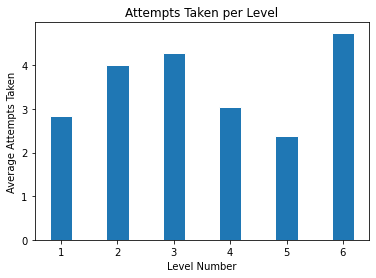

In [75]:
plt.bar([i for i in range(1,7)], avgatt, width = 0.4, edgecolor="white")
plt.xlabel("Level Number")
plt.ylabel("Average Attempts Taken")
plt.title("Attempts Taken per Level")
plt.xticks([1,2,3,4,5,6])
plt.show()

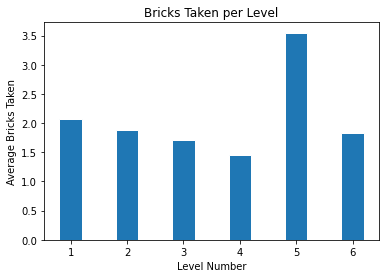

In [76]:
plt.bar([i for i in range(1,7)], avgbrc, width = 0.4, edgecolor="white")
plt.xlabel("Level Number")
plt.ylabel("Average Bricks Taken")
plt.title("Bricks Taken per Level")
plt.xticks([1,2,3,4,5,6])
plt.show()

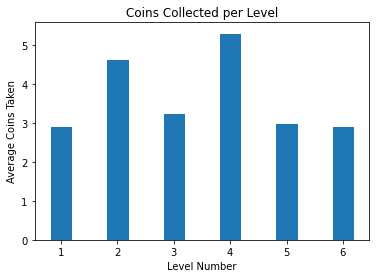

In [77]:
plt.bar([i for i in range(1,7)], avgcoll, width = 0.4, edgecolor="white")
plt.xlabel("Level Number")
plt.ylabel("Average Coins Taken")
plt.title("Coins Collected per Level")
plt.xticks([1,2,3,4,5,6])
plt.show()

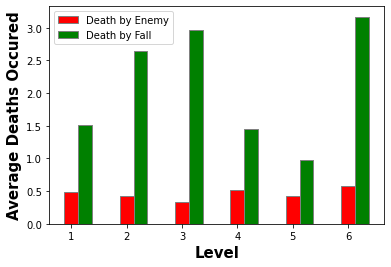

In [78]:
br1 = [i for i in range(1,7)]
br2 = [i + 0.25 for i in br1]
 
# Make the plot
plt.bar(br1, avgdbe, color ='r', width = 0.25,
        edgecolor ='grey', label ='Death by Enemy')
plt.bar(br2, avgdbf, color ='g', width = 0.25,
        edgecolor ='grey', label ='Death by Fall')
plt.xlabel('Level', fontweight ='bold', fontsize = 15)
plt.ylabel('Average Deaths Occured', fontweight ='bold', fontsize = 15)
plt.xticks([1,2,3,4,5,6])
plt.legend()
plt.show()

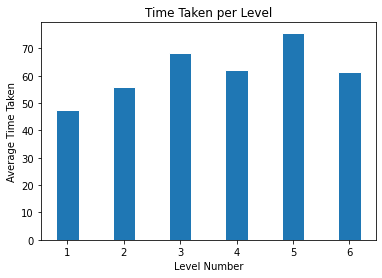

In [79]:
plt.bar([i for i in range(1,7)], avgtt, width = 0.4, edgecolor="white")
plt.xlabel("Level Number")
plt.ylabel("Average Time Taken")
plt.title("Time Taken per Level")
plt.xticks([1,2,3,4,5,6])
plt.show()

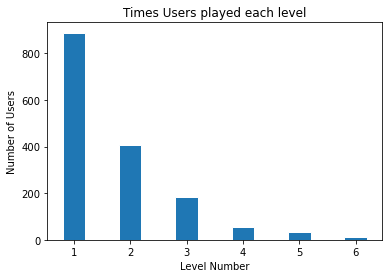

In [84]:
plt.bar([i for i in range(1,7)], lvlscount, width = 0.4, edgecolor="white")
plt.xlabel("Level Number")
plt.ylabel("Number of Users")
plt.title("Times Users played each level")
plt.xticks([1,2,3,4,5,6])
plt.show()